In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0106.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0285.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0074.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0077.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0235.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0273.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0307.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0058.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0255.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0128.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0364.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0246.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0337.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0208.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0141.jpg
/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test/0327.jpg
/kaggle/input/cnn-hands-

In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import matplotlib.pyplot as plt

In [88]:
images = []
labels = []

for i in os.listdir('/kaggle/input/cnn-hands-on-practice/COVID_IEEE/train'):
    folder = os.path.join('/kaggle/input/cnn-hands-on-practice/COVID_IEEE/train',i)
    for path in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder,path)
        img = image.load_img(img_path , target_size = (224 , 224))
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(folder.split('/')[-1])
images = np.array(images)
print(images.shape)
print(len(labels))

100%|██████████| 495/495 [00:00<00:00, 608.69it/s]


(1458, 224, 224, 3)
1458


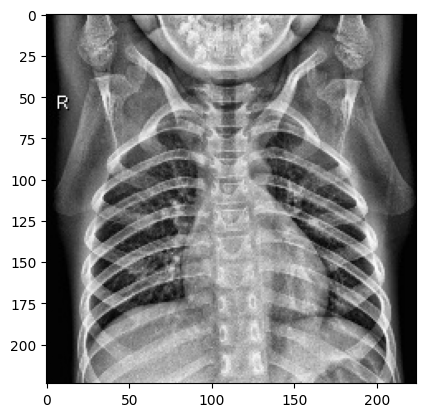

In [89]:

plt.imshow(images[0]/255.0)
plt.show()

In [90]:
l = []
for i in labels:
    if i == 'normal':
        l.append(0)
    elif i == 'covid':
        l.append(1)
    else:
        l.append(2)
labels = l

In [91]:
images = images/255.0
labels = np.array(labels)

In [92]:
from sklearn.model_selection import train_test_split 

In [93]:
train_images, test_images, train_labels, test_labels = train_test_split(images , labels , test_size = 0.2 , stratify = labels , random_state = 9)

In [94]:
print(train_images.shape)
print(test_images.shape)
print(len(train_labels))
print(len(test_labels))

(1166, 224, 224, 3)
(292, 224, 224, 3)
1166
292


## Model Building

In [147]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras import backend as K

import keras
from keras.models import Sequential
from keras.layers import Conv2D , Dense , Dropout, Flatten , MaxPooling2D

K.clear_session()

In [148]:
model = Sequential()

## Layers 1
model.add(Conv2D(16 , kernel_size  = (3,3) , padding = 'same' , activation = 'relu'  ,
               input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2) , strides = 1 , padding = 'same'))


## Layers 2
model.add(Conv2D(32 , kernel_size  = (3,3) , padding = 'same' , activation = 'relu' ))
model.add(MaxPooling2D(pool_size=(2,2) , strides = 1 , padding = 'same'))
          

model.add(Flatten())

model.add(Dense(32 , activation = 'relu'))
model.add(Dense(3 , activation = 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 224, 224, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1605632)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │      51,380,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,385,443 (196.02 MB)

 Trainable params: 51,385,443 (196.02 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])

history = model.fit(train_images, train_labels , validation_data = (test_images , test_labels) , 
                    epochs = 5 ,batch_size=32 ,verbose =1 )

Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.4372 - loss: 18.9323 - val_accuracy: 0.7260 - val_loss: 0.5285
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9244 - loss: 0.2460 - val_accuracy: 0.9144 - val_loss: 0.2378
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9879 - loss: 0.0501 - val_accuracy: 0.9486 - val_loss: 0.1748
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9973 - loss: 0.0143 - val_accuracy: 0.9486 - val_loss: 0.2160
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9988 - loss: 0.0036 - val_accuracy: 0.9521 - val_loss: 0.2670


In [150]:
# Check accuracy
train_accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy'] 
train_loss = history.history['loss'] 
val_loss = history.history['val_loss']  

print('train_accuracy' , max(train_accuracy))
print('val_accuracy' , max(val_accuracy))
print('train_loss' , min(train_loss))
print('val_loss' , min(val_loss))

train_accuracy 0.9991423487663269
val_accuracy 0.9520547986030579
train_loss 0.0034230919554829597
val_loss 0.1748134344816208


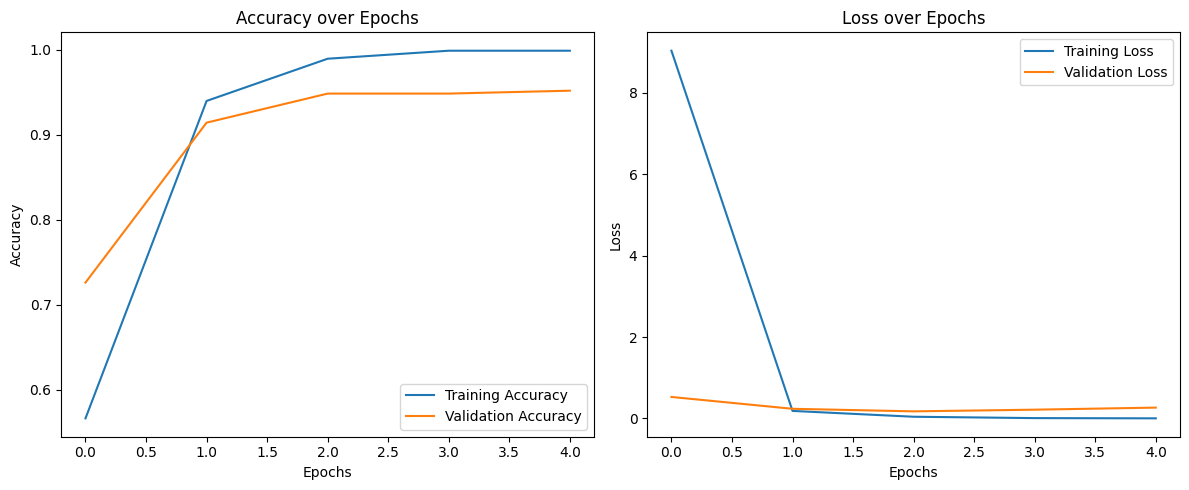

In [151]:
# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [152]:
y_train_predict = model.predict(train_images)
y_test_predict = model.predict(test_images)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [153]:
p1 = np.argmax(y_train_predict , axis = 1)
p2 = np.argmax(y_test_predict , axis = 1)

In [154]:
from sklearn.metrics import classification_report

In [155]:
print(classification_report(p1 , train_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       342
           2       1.00      1.00      1.00       396

    accuracy                           1.00      1166
   macro avg       1.00      1.00      1.00      1166
weighted avg       1.00      1.00      1.00      1166



In [156]:
print(classification_report(p2 , test_labels))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.98      0.99      0.98        85
           2       0.94      0.94      0.94        99

    accuracy                           0.95       292
   macro avg       0.95      0.95      0.95       292
weighted avg       0.95      0.95      0.95       292



In [157]:
import os


test = []
labels = []

for path in tqdm(os.listdir('/kaggle/input/cnn-hands-on-practice/COVID_IEEE/test')):
    img_path = os.path.join(folder,path)
    try:
        img = image.load_img(img_path , target_size = (224 , 224))
        img_array = image.img_to_array(img)
        test.append(img_array)
    except FileNotFoundError:
        print('error')

test = np.array(test)
print(test.shape)


100%|██████████| 366/366 [00:00<00:00, 777.54it/s]


(366, 224, 224, 3)


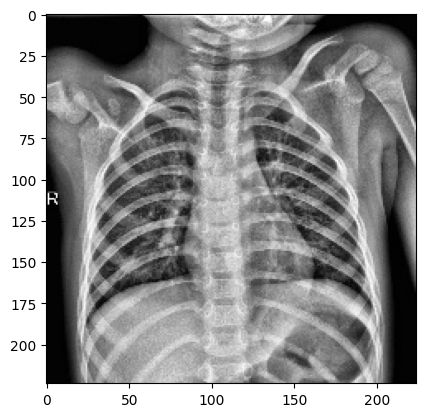

In [158]:
test = test/255.0
plt.imshow(test[0])
plt.show()

In [159]:
pred = model.predict(test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [160]:
pred = np.argmax(pred , axis =1)

In [161]:
pred

array([0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2,
       1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1,
       0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0,
       0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2,
       1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2,

In [162]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'ID': range(len(pred)),  
    'Label': pred
})

print(submission_df.head())

   ID  Label
0   0      0
1   1      1
2   2      0
3   3      2
4   4      2


In [163]:
submission_df.shape

(366, 2)

In [164]:
# Define CSV output file path in /kaggle/working directory
output_csv = '/kaggle/working/submission2.csv'

# Write to CSV
submission_df.to_csv(output_csv, index=False)

print(f"Submission CSV file generated at: {output_csv}")

Submission CSV file generated at: /kaggle/working/submission2.csv
